In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
housing_path = Path.cwd() / 'data' / 'housing.data'
housing_path.exists()

True

In [3]:
df = pd.read_csv(housing_path, header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
sns.set(style='whitegrid', context='notebook')

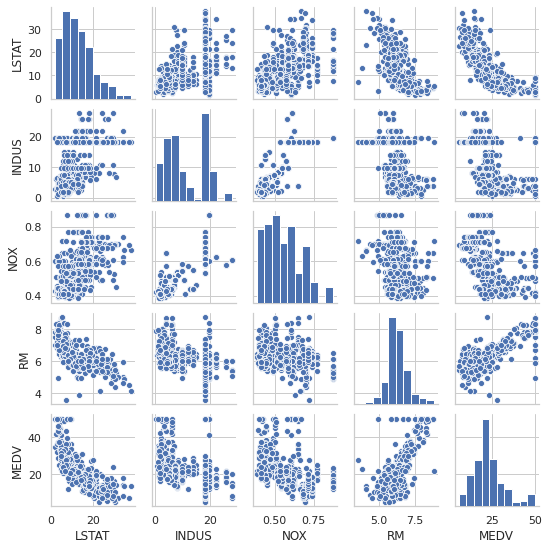

In [5]:
cols = [ 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV' ]
sns.pairplot(df[cols], height=1.5)

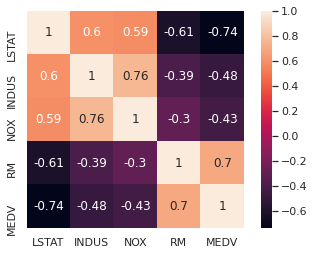

In [6]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols, xticklabels=cols)

In [7]:
X = df[['RM']].values
y = df['MEDV'].values

In [8]:
X.shape

(506, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y1 = y.reshape(-1,1)
y_std = sc_y.fit_transform(y1)

In [10]:
y_std = y_std.ravel()

In [11]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [12]:
lr1.fit(X_std, y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

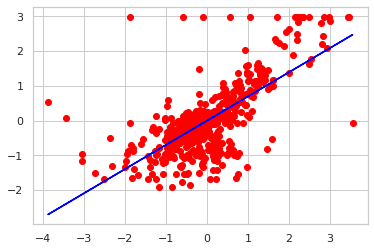

In [13]:
def linplot(X,y, predictor):
    plt.scatter(X[:,0], y, marker='o', color='red')
    plt.plot(X[:,0], predictor.predict(X), color='blue')
linplot(X_std, y_std, lr1)

In [14]:
lr1.coef_, lr1.intercept_

(array([0.69535995]), -4.4389206106451733e-16)

### (Дополнение) Несколько слов о системах линейных алгебраических уравнений

1. "Точные" методы решений.
    - Метод Гаусса-Жордана
    - Метод Крамера


$a_k \cdot x_k = b_k$

- *Беклемишев.* Линейная алгебра и аналитическая геометрия.
- *Светозарова, Сигитов, Козловский.* Программирование ЭВМ и численные методы.

2. Итерационные методы.
    - Метод Ньютона.
    - Градиентный спуск.

3. Стохастические методы

# Подгонка регрессионной модели

(Метод RANSAC)

In [15]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials  = 100,
                        min_samples = 50,
                        residual_threshold=0.9)

In [16]:
ransac.fit(X_std, y_std)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50,
                random_state=None, residual_threshold=0.9, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

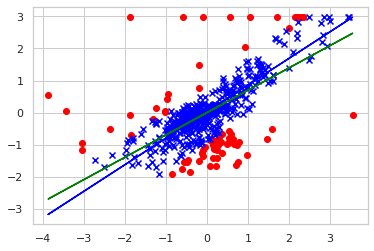

In [17]:
idx = ransac.inlier_mask_
neg = np.logical_not(idx)
plt.scatter(X_std[neg,0], y_std[neg], marker='o', color='red')
plt.scatter(X_std[idx,0], y_std[idx], marker='x', color='blue')
plt.plot(X_std[:,0], ransac.predict(X_std), color='blue')
plt.plot(X_std[:,0], lr1.predict(X_std), color='green')

In [18]:
ransac.estimator_.coef_

array([0.82763067])

In [19]:
ransac.estimator_.intercept_

0.03294173845724673

# Задание

1. Разбить нормализованный набор данных на обучающий и тестовый. (**train_test_split**)
2. Построить модель линейной регресии по обучающему набору.
3. Отобразить на диаграмме прогностическую кривую и тестовый набор данных.
4. Вычислить среднеквадартичное отклонение для обучающего набора и тестового набора.

In [20]:
from sklearn.model_selection import train_test_split
s = train_test_split(X_std, y_std, test_size=0.3)

In [21]:
X_train, X_test, y_train, y_test = s
lr2 = LinearRegression().fit(X_train, y_train)
y_train_pred = lr2.predict(X_train)
y_test_pred = lr2.predict(X_test)

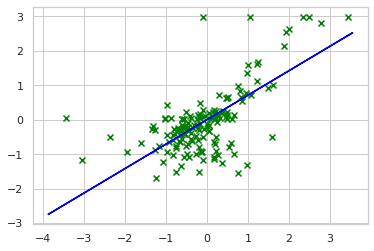

In [22]:
plt.scatter(X_test[:,0], y_test, marker='x', color='green')
plt.plot(X_train[:,0], y_train_pred, color='blue')

In [23]:
rs2 = RANSACRegressor(LinearRegression(),
                        max_trials  = 100,
                        min_samples = 50,
                        residual_threshold=0.9).fit(X_train, y_train)
y_train_pred_r = rs2.predict(X_train)
y_test_pred_r = rs2.predict(X_test)

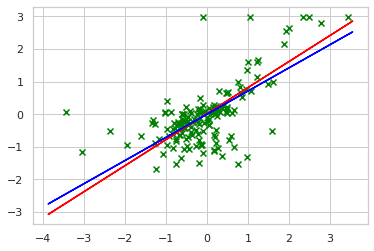

In [24]:
plt.scatter(X_test[:,0], y_test, marker='x', color='green')
plt.plot(X_train[:,0], y_train_pred_r, color='red')
plt.plot(X_train[:,0], y_train_pred, color='blue')

In [25]:
(y_train-y_train_pred).std(), (y_test-y_test_pred).std()

(0.7164461643026323, 0.7241934898886695)

In [26]:
(y_train-y_train_pred_r).std(), (y_test-y_test_pred_r).std()

(0.7220129582746069, 0.7344390498716887)

## Диаграмма остатков

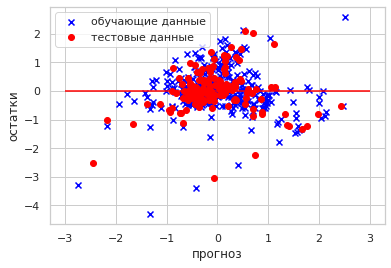

In [27]:
plt.scatter(y_train_pred, y_train_pred-y_train, marker='x', color='blue', label='обучающие данные')
plt.scatter(y_test_pred, y_test_pred-y_test, marker='o', color='red', label='тестовые данные')
plt.xlabel('прогноз')
plt.ylabel('остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=3, color='red')

In [28]:
X = df[['NOX', 'RM']].values

In [29]:
y = df['MEDV'].values

In [30]:
sc2 = StandardScaler()

In [31]:
X_std = sc2.fit_transform(X)
y1 = y.reshape(-1,1)
y_std = sc2.fit_transform(y1).ravel()

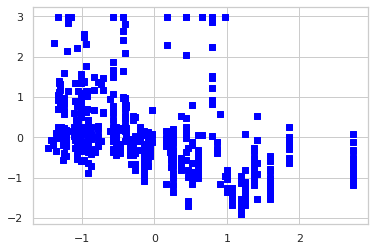

In [32]:
plt.scatter(X_std[:,0], y_std, marker='s', color='blue')

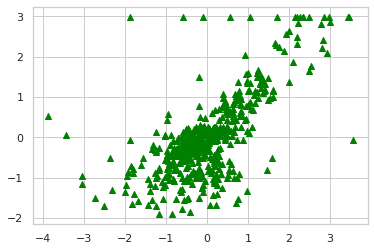

In [33]:
plt.scatter(X_std[:,1], y_std, marker='^', color='green')

In [34]:
lr3 = LinearRegression().fit(X_std,y_std)

In [35]:
y_pred = lr3.predict(X_std)

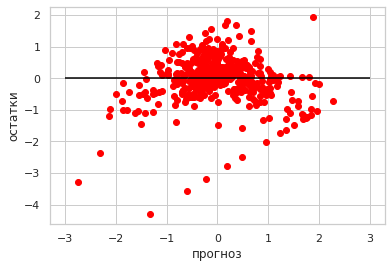

In [36]:
plt.scatter(y_pred, y_pred-y_std, marker='o', color='red')
plt.xlabel('прогноз')
plt.ylabel('остатки')
plt.hlines(y=0, xmin=-3, xmax=3, color='black')

In [37]:
from sklearn.linear_model import Ridge

In [38]:
rr1 = Ridge(alpha = 0.5).fit(X_std,y_std)
rr2 = Ridge(alpha = 1.0).fit(X_std,y_std)
rr3 = Ridge(alpha = 2.0).fit(X_std,y_std)

In [39]:
rr1.coef_ 

array([-0.23896248,  0.62253316])

In [40]:
rr2.coef_

array([-0.23890692,  0.62193598])

In [41]:
rr3.coef_

array([-0.238795  ,  0.62074538])

In [42]:
rr4 = Ridge(alpha = 100.0).fit(X_std,y_std)
rr4.coef_

array([-0.22460373,  0.52394159])

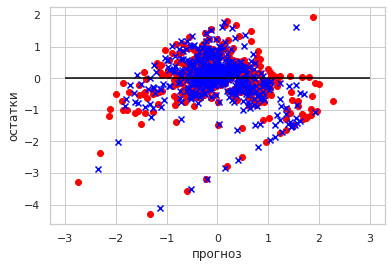

In [43]:
y_pred = lr3.predict(X_std)
y_pred_r = rr4.predict(X_std)
plt.scatter(y_pred, y_pred-y_std, marker='o', color='red')
plt.scatter(y_pred_r, y_pred_r-y_std, marker='x', color='blue')
plt.xlabel('прогноз')
plt.ylabel('остатки')
plt.hlines(y=0, xmin=-3, xmax=3, color='black')

In [44]:
from sklearn.linear_model import Lasso
ls1 = Lasso(alpha=0.2).fit(X_std,y_std)

In [45]:
alphas = np.arange(0.01,1.0,0.01)

In [46]:
coef = np.array([ Lasso(alpha=a).fit(X_std,y_std).coef_ for a in alphas ])

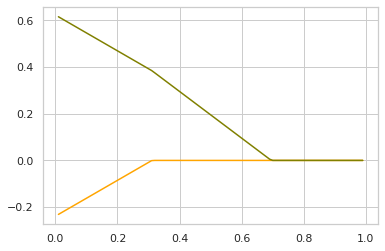

In [47]:
plt.plot(alphas, coef[:,0], color='orange')
plt.plot(alphas, coef[:,1], color='olive')

# Задание

1. Выбрать из множества housing три признака и построить модель простой линейной регрессии без подгонки.
2. Построить модель на тех же признаках методом Lasso.
3. Найти наименее значимый признак.
4. Построить методом простой линейной регрессии без подгонки модель, исключив менее значимый признак.
5. Отобразить и сравнить диаграммы остатков для первой и последней модели.

# Полиномиальная регрессия

In [48]:
X = np.arange(0, 6.0, 0.3)
y1 = 3.5*X + 0.1
y2 = 1.0*X**2 + 0.3*X + 0.1
y3 = 0.5*X**3 - 2.0*X**2 + 0.4*X - 0.1

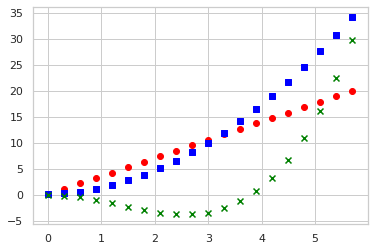

In [49]:
plt.scatter(X,y1,marker='o', color='red')
plt.scatter(X,y2,marker='s', color='blue')
plt.scatter(X,y3,marker='x', color='green')

In [50]:
X = X.reshape(-1,1)

In [51]:
lr01 = LinearRegression().fit(X,y1)

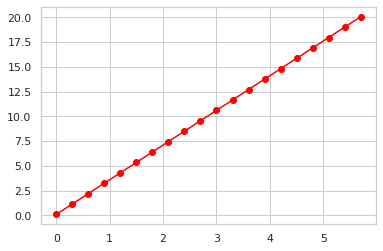

In [52]:
plt.scatter(X[:,0], y1, marker='o', color='red')
plt.plot(X[:,0], lr01.predict(X), color='red')

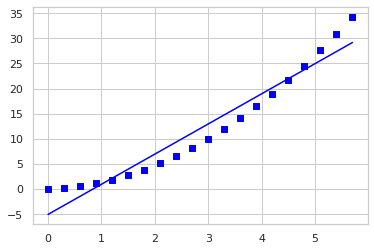

In [53]:
lr02 = LinearRegression().fit(X,y2)
plt.scatter(X[:,0], y2, marker='s', color='blue')
plt.plot(X[:,0], lr02.predict(X), color='blue')

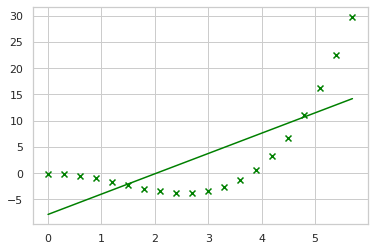

In [54]:
lr03 = LinearRegression().fit(X,y3)
plt.scatter(X[:,0], y3, marker='x', color='green')
plt.plot(X[:,0], lr03.predict(X), color='green')

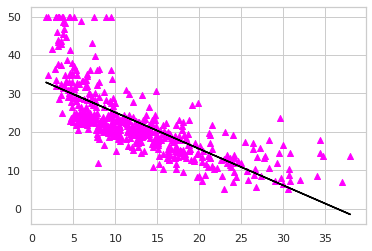

In [55]:
Xa = df[['LSTAT']].values
ya = df['MEDV'].values
lra = LinearRegression().fit(Xa, ya)
plt.scatter(Xa[:,0], ya, marker='^', color='magenta')
plt.plot(Xa[:,0], lra.predict(Xa), color='black')

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
quadro = PolynomialFeatures(degree=2)
cubic  = PolynomialFeatures(degree=3)

In [58]:
X2 = quadro.fit_transform(X)

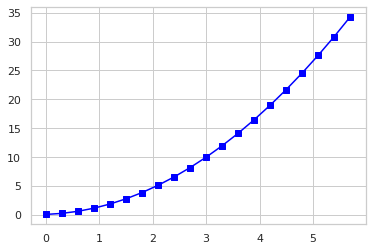

In [60]:
lr02a = LinearRegression().fit(X2,y2)
plt.scatter(X[:,0], y2, marker='s', color='blue')
plt.plot(X[:,0], lr02a.predict(X2), color='blue')

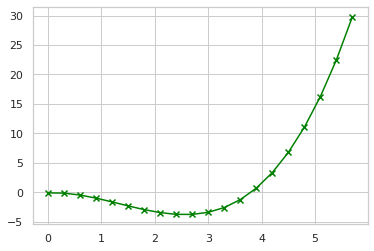

In [61]:
X3 = cubic.fit_transform(X)
lr03a = LinearRegression().fit(X3,y3)
plt.scatter(X[:,0], y3, marker='x', color='green')
plt.plot(X[:,0], lr03a.predict(X3), color='green')

# Задание
Для множества LSTAT->MEDV построить модели полиномиальной регресии порядка от 1 до 3 включительно и оценить, какая из этих моделей подходит лучше.

In [62]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.3)

In [63]:
n1 = PolynomialFeatures(degree=1).fit(Xa_train)
n2 = PolynomialFeatures(degree=2).fit(Xa_train)
n3 = PolynomialFeatures(degree=3).fit(Xa_train)
n4 = PolynomialFeatures(degree=4).fit(Xa_train)

In [64]:
Xa_train_std_1 = n1.transform(Xa_train)
Xa_train_std_2 = n2.transform(Xa_train)
Xa_train_std_3 = n3.transform(Xa_train)
Xa_train_std_4 = n4.transform(Xa_train)
Xa_test_std_1 = n1.transform(Xa_test)
Xa_test_std_2 = n2.transform(Xa_test)
Xa_test_std_3 = n3.transform(Xa_test)
Xa_test_std_4 = n4.transform(Xa_test)

In [65]:
lra1 = LinearRegression().fit(Xa_train_std_1, ya_train)
lra2 = LinearRegression().fit(Xa_train_std_2, ya_train)
lra3 = LinearRegression().fit(Xa_train_std_3, ya_train)
lra4 = LinearRegression().fit(Xa_train_std_4, ya_train)

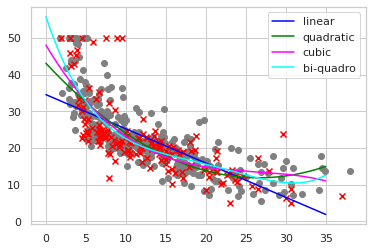

In [76]:
Xp0 = np.arange(0,35,0.1).reshape(-1,1)
Xp1 = n1.transform(Xp0)
Xp2 = n2.transform(Xp0)
Xp3 = n3.transform(Xp0)
Xp4 = n4.transform(Xp0)
plt.scatter(Xa_train, ya_train, marker='o', color='gray')
plt.scatter(Xa_test, ya_test, marker='x', color='red')
plt.plot( Xp0, lra1.predict(Xp1), color='blue', label='linear' )
plt.plot( Xp0, lra2.predict(Xp2), color='green', label='quadratic' )
plt.plot( Xp0, lra3.predict(Xp3), color='magenta', label='cubic' )
plt.plot( Xp0, lra4.predict(Xp4), color='cyan', label='bi-quadro' )
plt.legend(loc='upper right')

In [77]:
( y_test - lra1.predict(Xa_test_std_1) ).std()

6.554421934667488

In [78]:
( y_test - lra2.predict(Xa_test_std_2) ).std()

7.342353130312176

In [79]:
( y_test - lra3.predict(Xa_test_std_3) ).std()

7.329055333211718

In [80]:
( y_test - lra4.predict(Xa_test_std_4) ).std()

7.357773791382524

$y = a_0 + a_1 \cdot x$

In [81]:
lra1.coef_

array([ 0.        , -0.93592881])

In [82]:
lra2.coef_

array([ 0.        , -2.35495634,  0.0443765 ])

In [83]:
lra3.coef_

array([ 0.00000000e+00, -3.67050763e+00,  1.34831995e-01, -1.72088877e-03])

In [84]:
lra1.intercept_

34.518462948706464

$ y = a_0 + \sum\limits_{k=1}^{N}a_k x^k$

$ y = a_0 + a_1 x $

$y = a_0 + a_1 x + a_2 x^2$